In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('electricity consumption.csv')
df

,Year,Month,Domestic,Commercial,Industrial,Total,Avg temp,Avg dew pt temp,Humidity(%)
0,2012,1,2586,6983,780,10349,15.1,11.9,82
1,2012,2,2666,6507,809,9982,15.8,13.1,85
2,2012,3,2827,7294,868,10989,19.0,15.8,83
3,2012,4,2753,7921,910,11584,23.9,21.2,85
4,2012,5,3862,9852,1047,14761,27.0,24.4,86
...,...,...,...,...,...,...,...,...,...
115,2021,8,5453,10459,1033,16945,28.8,25.4,83
116,2021,9,5686,10246,1036,16968,29.7,25.4,78
117,2021,10,3850,9231,907,13988,26.0,21.4,76
118,2021,11,3098,7615,760,11473,22.4,15.8,67


In [3]:
el = np.array(df['Total']).reshape(-1, 1)
month = np.array(df['Month']).reshape(-1, 1)
temp = np.array(df['Avg temp']).reshape(-1, 1)
dtemp = np.array(df['Avg dew pt temp']).reshape(-1, 1)
hu = np.array(df['Humidity(%)']).reshape(-1, 1)

# A scatter plot to represent the relationship between the rescaled months (x) and the rescaled electricity consumption (y)

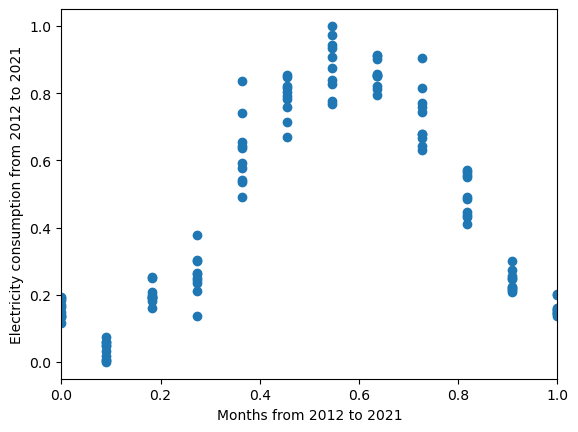

In [4]:
scaler = MinMaxScaler()
month1 = scaler.fit_transform(month)
Y = scaler.fit_transform(el)

plt.scatter(month1, Y)

plt.xlabel("Months from 2012 to 2021")
plt.ylabel("Electricity consumption from 2012 to 2021")
plt.xlim((0, 1))
plt.show()

# A scatter plot to represent the relationship between the rescaled average temperature (x) and the rescaled electricity consumption (y)

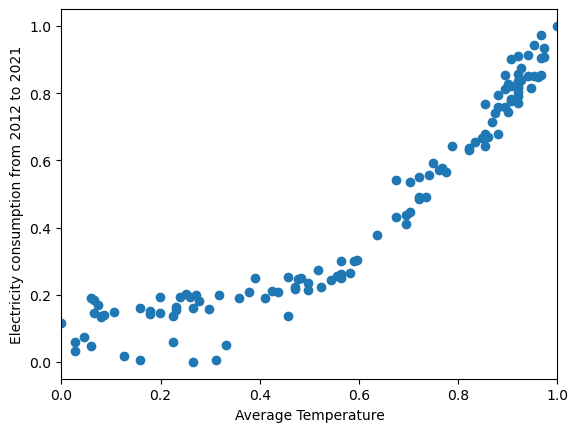

In [5]:
scaler = MinMaxScaler()
temp1 = scaler.fit_transform(temp)
Y = scaler.fit_transform(el)


plt.scatter(temp1, Y)

plt.xlabel("Average Temperature")
plt.ylabel("Electricity consumption from 2012 to 2021")
plt.xlim((0, 1))
plt.show()

# A scatter plot to represent the relationship between the rescaled average dew point temperature (x) and the rescaled electricity consumption (y)

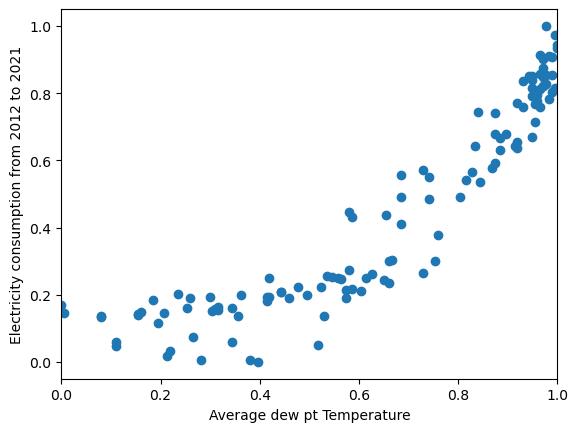

In [6]:
scaler = MinMaxScaler()
dtemp1 = scaler.fit_transform(dtemp)
Y = scaler.fit_transform(el)


plt.scatter(dtemp1, Y)

plt.xlabel("Average dew pt Temperature")
plt.ylabel("Electricity consumption from 2012 to 2021")
plt.xlim((0, 1))
plt.show()

# A scatter plot to represent the relationship between the rescaled months (x) and the rescaled electricity consumption (y)

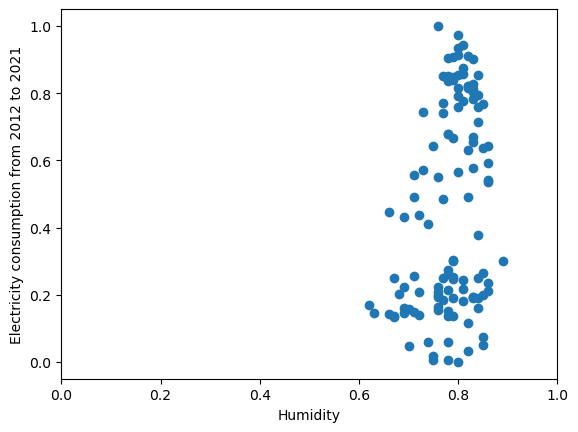

In [7]:
scaler = MinMaxScaler()
hu1 = hu/100
Y = scaler.fit_transform(el)


plt.scatter(hu1, Y)

plt.xlabel("Humidity")
plt.ylabel("Electricity consumption from 2012 to 2021")
plt.xlim((0, 1))
plt.show()

# Here I will use the months, the temperature, the dew point temperature and the humidity as the independant variables x
## Then group them into a 120x4 matrix

In [8]:
X = np.concatenate((month, temp, dtemp, hu), axis = 1)

print(len(X), (X.size / len(X)))
print(X)

120 4.0
[[ 1.  15.1 11.9 82. ]
 [ 2.  15.8 13.1 85. ]
 [ 3.  19.  15.8 83. ]
 [ 4.  23.9 21.2 85. ]
 [ 5.  27.  24.4 86. ]
 [ 6.  28.1 25.  83. ]
 [ 7.  28.8 25.2 81. ]
 [ 8.  29.5 24.9 77. ]
 [ 9.  28.  23.  75. ]
 [10.  25.6 20.4 74. ]
 [11.  22.2 18.7 81. ]
 [12.  17.8 13.8 78. ]
 [ 1.  16.7 11.3 71. ]
 [ 2.  19.1 15.4 80. ]
 [ 3.  20.5 16.5 79. ]
 [ 4.  21.5 19.  86. ]
 [ 5.  25.7 23.2 86. ]
 [ 6.  28.2 25.1 84. ]
 [ 7.  28.  25.1 85. ]
 [ 8.  28.6 25.3 83. ]
 [ 9.  27.5 23.9 82. ]
 [10.  25.7 18.6 66. ]
 [11.  21.7 16.2 72. ]
 [12.  16.1  8.6 63. ]
 [ 1.  16.3  9.9 67. ]
 [ 2.  15.5 12.3 82. ]
 [ 3.  18.7 15.7 83. ]
 [ 4.  22.6 20.  86. ]
 [ 5.  26.4 23.7 86. ]
 [ 6.  29.  25.  80. ]
 [ 7.  29.8 25.9 80. ]
 [ 8.  29.  25.3 81. ]
 [ 9.  29.  24.5 77. ]
 [10.  26.2 20.4 71. ]
 [11.  22.6 18.5 78. ]
 [12.  16.3  9.9 67. ]
 [ 1.  16.4 11.2 72. ]
 [ 2.  17.5 13.4 78. ]
 [ 3.  19.9 17.1 85. ]
 [ 4.  23.6 19.2 77. ]
 [ 5.  27.5 24.5 85. ]
 [ 6.  29.7 25.7 80. ]
 [ 7.  29.1 25.  79. ]
 [ 

# Linear Regression

## No transformation

## Split and rescale the data, then fit a model and perform cross validation

In [9]:
for seed in range(364, 369):
    X_train, X_test, Y_train, Y_test = train_test_split(X, el, test_size = 0.2, random_state = seed)

    X_train = scaler.fit_transform(X_train)
    Y_train = scaler.fit_transform(Y_train)
    
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    
    print('Estimated intercept:', lr.intercept_)
    print('Estimated coefficient:', lr.coef_)
    
    cv = KFold(n_splits = 5, shuffle = True, random_state = seed)
    print('MSE: ', -cross_val_score(lr, X_train, Y_train, scoring = 'neg_mean_squared_error', cv = cv))
    print('Variance: ', cross_val_score(lr, X_train, Y_train, scoring = 'explained_variance', cv = cv))
    
    X_test = scaler.fit_transform(X_test)
    Y_test = scaler.fit_transform(Y_test)

    print('Test MSE: ', mean_squared_error(Y_test, lr.predict(X_test)), '\n')

Estimated intercept: [0.05633187]
Estimated coefficient: [[-0.09002369  0.0268119   1.12497789 -0.48235085]]
MSE:  [0.00853477 0.014299   0.01192372 0.02093978 0.01369451]
Variance:  [0.90366366 0.8506119  0.8821686  0.84671716 0.82097415]
Test MSE:  0.019488600679710155 

Estimated intercept: [-0.00764415]
Estimated coefficient: [[-0.08761399  0.76874115  0.2157284  -0.14407657]]
MSE:  [0.01556125 0.00826831 0.0125176  0.0137756  0.0146768 ]
Variance:  [0.83933412 0.85667979 0.86849049 0.83202989 0.85469049]
Test MSE:  0.011858630889483092 

Estimated intercept: [-0.05840475]
Estimated coefficient: [[-0.06206901  1.45695791 -0.60696504  0.15285069]]
MSE:  [0.01700465 0.01460414 0.01130284 0.01218176 0.0122216 ]
Variance:  [0.87619427 0.86732615 0.88477188 0.88782984 0.86190177]
Test MSE:  0.01312718010640145 

Estimated intercept: [0.00954361]
Estimated coefficient: [[-0.07667176  0.18211825  0.93615467 -0.39353085]]
MSE:  [0.0142595  0.01351427 0.01059776 0.01438161 0.01092597]
Varia

## Polynomial features of degree at most 2

## Use PolynomialFeatures to generate all polynomial of degree at most 2 from the raw input $x$:

In [10]:
poly2 = PolynomialFeatures(degree = 2, include_bias = False)
X2 = poly2.fit_transform(X)
print(len(X2), (X2.size / len(X2)))

120 14.0


## Split and rescale the data, then fit a model and perform cross validation

In [21]:
for seed in range(364, 369):
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, el, test_size = 0.2, random_state = seed)

    X2_train = scaler.fit_transform(X2_train)
    Y2_train = scaler.fit_transform(Y2_train)
    
    lr2 = LinearRegression()
    lr2.fit(X2_train, Y2_train)
    
    print('Estimated intercept:', lr2.intercept_)
    print('Estimated coefficient:', lr2.coef_)
    
    cv = KFold(n_splits = 5, shuffle = True, random_state = seed)
    print('MSE: ', -cross_val_score(lr2, X2_train, Y2_train, scoring = 'neg_mean_squared_error', cv = cv))
    print('Varience: ', cross_val_score(lr2, X2_train, Y2_train, scoring = 'explained_variance', cv = cv))
    
    X2_test = scaler.fit_transform(X2_test)
    Y2_test = scaler.fit_transform(Y2_test)

    print('Test MSE: ', mean_squared_error(Y2_test, lr2.predict(X2_test)), '\n')

Estimated intercept: [2.26396351]
Estimated coefficient: [[   0.2978356  -120.77673708  143.88646209  -47.33077956    0.44690534
    -0.89858541    0.71667081   -0.50541066  133.24010822 -257.10716765
   119.28539733  125.48612375 -141.25315008   37.8656732 ]]
MSE:  [0.0029741  0.00422146 0.00271733 0.0036356  0.00266522]
Varience:  [0.96930525 0.95736528 0.97507825 0.96816803 0.9648773 ]
Test MSE:  76.43537902178834 

Estimated intercept: [7.43270562]
Estimated coefficient: [[ 5.57123649e-01 -3.85268141e+02  4.55043632e+02 -1.55074819e+02
   5.93848080e-01 -1.19925656e+00  9.68764920e-01 -8.94274821e-01
   4.13166218e+02 -7.84254255e+02  3.79531957e+02  3.82317708e+02
  -4.47373102e+02  1.24840409e+02]]
MSE:  [0.00371539 0.00211998 0.00263564 0.00203442 0.00299216]
Varience:  [0.96056325 0.96679703 0.97475936 0.9755403  0.96765224]
Test MSE:  3.9612587389463414 

Estimated intercept: [5.60762437]
Estimated coefficient: [[-4.02981989e-02 -2.57411724e+02  3.13350505e+02 -1.10985539e+02


## Polynomial features of degree at most 3

## Use PolynomialFeatures to generate all polynomial of degree at most 3 from the raw input $x$:

In [12]:
poly3 = PolynomialFeatures(degree = 3, include_bias = False)
X3 = poly3.fit_transform(X)
print(len(X3), (X3.size / len(X3)))

120 34.0


## Split and rescale the data, then fit a model and perform cross validation

In [22]:
for seed in range(364, 369):
    X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, el, test_size = 0.2, random_state = seed)

    X3_train = scaler.fit_transform(X3_train)
    Y3_train = scaler.fit_transform(Y3_train)
    
    lr3 = LinearRegression()
    lr3.fit(X3_train, Y3_train)
    
    print('Estimated intercept:', lr3.intercept_)
    print('Estimated coefficient:', lr3.coef_)
    
    cv = KFold(n_splits = 5, shuffle = True, random_state = seed)
    print('MSE: ', -cross_val_score(lr3, X3_train, Y3_train, scoring = 'neg_mean_squared_error', cv = cv))
    print('Variance: ', cross_val_score(lr3, X3_train, Y3_train, scoring = 'explained_variance', cv = cv))
    
    X3_test = scaler.fit_transform(X3_test)
    Y3_test = scaler.fit_transform(Y3_test)

    print('Test MSE: ', mean_squared_error(Y3_test, lr3.predict(X3_test)), '\n')

Estimated intercept: [-178.42301244]
Estimated coefficient: [[-1.43667844e+02  2.78644872e+04 -3.60471580e+04  1.32650199e+04
  -2.42387045e+01  1.78933559e+02 -2.07385885e+02  3.31319920e+02
  -5.44047482e+04  1.15559937e+05 -6.27014435e+04 -5.97413688e+04
   7.78131481e+04 -2.28655604e+04 -1.65795125e+00  4.22786924e+01
  -3.67349264e+01  1.90589493e+01 -7.86386000e+01  1.91008911e+02
  -2.64729158e+02 -1.07561185e+02  2.91461239e+02 -1.74121630e+02
   2.66774661e+04 -8.09557326e+04  5.40856937e+04  8.12972586e+04
  -1.15559905e+05  3.59611645e+04 -2.64948785e+04  5.86906565e+04
  -4.08001763e+04  9.84327080e+03]]
MSE:  [0.00440177 0.0522802  0.00329351 0.01263238 0.00402967]
Variance:  [0.95038589 0.39699054 0.96744667 0.8875134  0.94670481]
Test MSE:  11781213.073245177 

Estimated intercept: [-235.9351775]
Estimated coefficient: [[-2.11431260e+00  3.61670123e+04 -4.64585105e+04  1.71780631e+04
  -4.04362567e+01 -1.47700326e+02  8.84320981e+01  1.25596121e+02
  -7.06609219e+04  1.4

## Polynomial features of degree at most 10

## Use PolynomialFeatures to generate all polynomial of degree at most 10 from the raw input $x$:

In [14]:
poly10 = PolynomialFeatures(degree = 10, include_bias = False)
X10 = poly10.fit_transform(X)
print(len(X10), (X10.size / len(X10)))

120 1000.0


## Split and rescale the data, then fit a model and perform cross validation

In [23]:
for seed in range(364, 369):
    X10_train, X10_test, Y10_train, Y10_test = train_test_split(X10, el, test_size = 0.2, random_state = seed)

    X10_train = scaler.fit_transform(X10_train)
    Y10_train = scaler.fit_transform(Y10_train)
    
    lr10 = LinearRegression()
    lr10.fit(X10_train, Y10_train)
    
    print('Estimated intercept:', lr10.intercept_)
    print('Estimated coefficient:', lr10.coef_)
    
    cv = KFold(n_splits = 5, shuffle = True, random_state = seed)
    print('MSE: ', -cross_val_score(lr10, X10_train, Y10_train, scoring = 'neg_mean_squared_error', cv = cv))
    print('Varience: ', cross_val_score(lr10, X10_train, Y10_train, scoring = 'explained_variance', cv = cv))
    
    X10_test = scaler.fit_transform(X10_test)
    Y10_test = scaler.fit_transform(Y10_test)

    print('Test MSE: ', mean_squared_error(Y10_test, lr10.predict(X10_test)), '\n')

Estimated intercept: [16.79601886]
Estimated coefficient: [[ 1.56105998e+02 -7.97013702e+01  2.22105908e+02  2.32172617e+02
   3.57735580e+02  1.46437150e+02  5.72483562e+02 -1.30566352e+02
   6.18298750e+01  6.37003698e+02  1.23513602e+02  1.26490213e+01
  -5.41644709e+02 -3.35537292e+02 -1.65304690e+02 -4.08584646e+02
  -3.15265048e+02  2.88143901e+02  1.54601461e+02  1.27295236e+02
  -2.65733700e+02 -1.62021220e+02  3.87354329e+02 -1.98083568e+02
  -1.32149428e+02  2.66752022e+02  6.01484623e+01 -1.97810249e+02
   4.37205225e+01 -9.67681708e+01 -2.56139282e+02  6.59362163e+01
  -4.54941924e+02 -1.87245724e+02 -8.93946584e+00 -3.94584430e+02
  -4.84899730e+02 -1.30146988e+02 -2.57687408e+02  1.19209168e+01
  -1.08056573e+02  2.37100827e+02  8.65219821e+01  1.91646409e+02
   2.13964665e+02  4.10376098e+01 -1.04290980e+02 -2.05018422e+02
  -2.97802208e+01 -4.57222662e+02 -4.24307785e+02 -6.08097818e+01
   2.14193036e+02 -1.17426587e+02 -2.11403919e+02  1.85428904e+01
  -2.63375514e+01 

Varience:  [  -1.05146667   -0.52148858 -131.02724529   -1.41762031 -180.05535491]
Test MSE:  663660.8914583911 

Estimated intercept: [-12.87058029]
Estimated coefficient: [[ 5.88149343e+02  1.79701567e+02  8.65771421e+01 -2.75189293e+02
   1.77149060e+02  6.31117278e+02 -1.09632033e+01 -5.10534658e+02
  -1.69803265e+02 -6.17741399e+02 -1.78070750e+02 -4.34016344e+02
   4.16401871e+02  3.97058597e+02 -1.61159405e+02  1.06614204e+02
  -1.92004553e+02 -6.15183281e+01  3.10747628e+02  1.94989156e+02
  -2.76199133e+02  4.23440893e+02 -2.20118596e+02 -5.90649406e+02
   1.54186684e+02 -1.36685046e+02 -3.46484484e+02  7.18530712e+01
  -2.55802451e+02  1.91666207e+02  2.30600945e+02 -3.19215167e+02
   3.40283007e+02  2.55694566e+02 -1.38683248e+02 -1.44508382e+02
  -3.96412310e+02 -2.22708105e+02  5.26756884e+01  1.12175615e+02
  -1.21313967e+02  3.94317787e+02 -1.10477162e+02  6.10695137e+01
   3.09648620e+01  1.56831616e+02 -3.30351663e+02  2.94976714e+02
  -1.06303155e+02 -3.08841809e+02  

## From the above cases, we can see that using data with *no transfromation*  to train the model by linear regrassion perform better in predicting the data, so it is prefered

# Decision Tree Regreesion

In [16]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

## No transformation

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, el, test_size = 0.2, random_state = 0)

X_train = scaler.fit_transform(X_train)
Y_train = scaler.fit_transform(Y_train)

for n in range(1, 6):
    Tree_1 = DecisionTreeRegressor(max_depth = n)
    Tree_1.fit(X_train, Y_train)

    cv = KFold(n_splits = 5, shuffle = True, random_state = n)
    
    print('MSE: ', -cross_val_score(Tree_1, X_train, Y_train, scoring = 'neg_mean_squared_error', cv = cv))
    print('Variance: ', cross_val_score(Tree_1, X_train, Y_train, scoring = 'explained_variance', cv = cv))

    X_test = scaler.fit_transform(X_test)
    Y_test = scaler.fit_transform(Y_test)

    print('Test MSE: ', mean_squared_error(Y_test, Tree_1.predict(X_test)), '\n')

MSE:  [0.0108411  0.0223753  0.01364063 0.01830889 0.01397324]
Variance:  [0.90044722 0.62411239 0.87341047 0.71400101 0.87597901]
Test MSE:  0.02025476466882076 

MSE:  [0.00884427 0.00880504 0.00804743 0.00609642 0.00892214]
Variance:  [0.87779405 0.87946242 0.93187103 0.9158009  0.90527025]
Test MSE:  0.006716525444789667 

MSE:  [0.0046297  0.00678654 0.00579307 0.00477663 0.00468899]
Variance:  [0.95686115 0.92434025 0.9127136  0.95507888 0.94658165]
Test MSE:  0.003473360798556198 

MSE:  [0.0021264  0.00353675 0.00417859 0.00382018 0.00492648]
Variance:  [0.96734239 0.95559022 0.96761858 0.96106761 0.95721866]
Test MSE:  0.0019420311446791637 

MSE:  [0.0033021  0.00297789 0.00196924 0.00769279 0.00219591]
Variance:  [0.96944844 0.96860615 0.95546379 0.93830062 0.97773296]
Test MSE:  0.0019689627091607083 



## Polynomial features of degree at most 2

In [18]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, el, test_size = 0.2, random_state = 0)

X2_train = scaler.fit_transform(X2_train)
Y2_train = scaler.fit_transform(Y2_train)

for n in range(1, 6):
    Tree_2 = DecisionTreeRegressor(max_depth = n)
    Tree_2.fit(X2_train, Y2_train)


    cv = KFold(n_splits = 5, shuffle = True, random_state = n)
    print('MSE: ', -cross_val_score(Tree_2, X2_train, Y2_train, scoring = 'neg_mean_squared_error', cv = cv))
    print('Variance: ', cross_val_score(Tree_2, X2_train, Y2_train, scoring = 'explained_variance', cv = cv))

    X2_test = scaler.fit_transform(X2_test)
    Y2_test = scaler.fit_transform(Y2_test)

    print('Test MSE: ', mean_squared_error(Y2_test, Tree_2.predict(X2_test)), '\n')

MSE:  [0.016576   0.0223753  0.01349026 0.0178784  0.01358589]
Variance:  [0.88339275 0.62411239 0.8742524  0.71056124 0.87759394]
Test MSE:  0.017490309343163746 

MSE:  [0.01084153 0.00627982 0.00971003 0.00613237 0.00890294]
Variance:  [0.85209536 0.91915302 0.91704315 0.9286545  0.95317368]
Test MSE:  0.007181343096896612 

MSE:  [0.00435092 0.00476753 0.00376786 0.00287894 0.00751016]
Variance:  [0.95889815 0.92824208 0.94496691 0.97432293 0.90613539]
Test MSE:  0.003659701988427842 

MSE:  [0.00217301 0.00224023 0.00199376 0.00183558 0.00615977]
Variance:  [0.95376148 0.97280788 0.98077562 0.96858902 0.93892409]
Test MSE:  0.003115828923507636 

MSE:  [0.00234053 0.00292523 0.0030272  0.00676186 0.00287517]
Variance:  [0.97524853 0.96971286 0.9513631  0.94455595 0.97522344]
Test MSE:  0.0033986005810117265 



## Polynomial features of degree at most 3

In [19]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, el, test_size = 0.2, random_state = 0)

X3_train = scaler.fit_transform(X3_train)
Y3_train = scaler.fit_transform(Y3_train)

for n in range(1, 6):
    Tree_3 = DecisionTreeRegressor(max_depth = n)
    Tree_3.fit(X3_train, Y3_train)


    cv = KFold(n_splits = 5, shuffle = True, random_state = n)
    print('MSE: ', -cross_val_score(Tree_3, X3_train, Y3_train, scoring = 'neg_mean_squared_error', cv = cv))
    print('Variance: ', cross_val_score(Tree_3, X3_train, Y3_train, scoring = 'explained_variance', cv = cv))

    X3_test = scaler.fit_transform(X3_test)
    Y3_test = scaler.fit_transform(Y3_test)

    print('Test MSE: ', mean_squared_error(Y3_test, Tree_3.predict(X3_test)), '\n')

MSE:  [0.016576   0.01851382 0.01349026 0.0178784  0.01358589]
Variance:  [0.88339275 0.62411239 0.8742524  0.71056124 0.87759394]
Test MSE:  0.017490309343163746 

MSE:  [0.0114876  0.00627982 0.00971003 0.00613237 0.00890294]
Variance:  [0.85929067 0.91915302 0.91704315 0.9286545  0.90518537]
Test MSE:  0.0071813430968966155 

MSE:  [0.00452751 0.0046883  0.00376786 0.00322778 0.00694034]
Variance:  [0.95753892 0.93797497 0.94496691 0.97432293 0.91811547]
Test MSE:  0.0028312065625031913 

MSE:  [0.00432326 0.00414026 0.00189434 0.00334969 0.00668608]
Variance:  [0.9595916  0.95366348 0.9687121  0.95981109 0.93994289]
Test MSE:  0.003169088253639049 

MSE:  [0.00259557 0.00267239 0.00230261 0.00664446 0.00371265]
Variance:  [0.96433925 0.97049675 0.9869142  0.94510404 0.9694976 ]
Test MSE:  0.0034555734020177316 



## From the above 3 cases, we can see that the test MSE, the MSE and the varience in CV are medium when the depth of tree = 4, so we focus and compare the data in the case on the depth of tree = 4 

In [20]:
Tree_1 = DecisionTreeRegressor(max_depth = 4)
Tree_1.fit(X_train, Y_train)
cv = KFold(n_splits = 5, shuffle = True, random_state = 0)
print('MSE_1: ', -cross_val_score(Tree_1, X_train, Y_train, scoring = 'neg_mean_squared_error', cv = cv))
print('Variance_1: ', cross_val_score(Tree_1, X_train, Y_train, scoring = 'explained_variance', cv = cv))
X_test = scaler.fit_transform(X_test)
Y_test = scaler.fit_transform(Y_test)
print('Test_MSE_1: ', mean_squared_error(Y_test, Tree_1.predict(X_test)), '\n')


Tree_2 = DecisionTreeRegressor(max_depth = 4)
Tree_2.fit(X2_train, Y2_train)
cv = KFold(n_splits = 5, shuffle = True, random_state = 0)
print('MSE_2: ', -cross_val_score(Tree_2, X2_train, Y2_train, scoring = 'neg_mean_squared_error', cv = cv))
print('Variance_2: ', cross_val_score(Tree_2, X2_train, Y2_train, scoring = 'explained_variance', cv = cv))
X2_test = scaler.fit_transform(X2_test)
Y2_test = scaler.fit_transform(Y2_test)
print('Test_MSE_2: ', mean_squared_error(Y2_test, Tree_2.predict(X2_test)), '\n')


Tree_3 = DecisionTreeRegressor(max_depth = 4)
Tree_3.fit(X3_train, Y3_train)
cv = KFold(n_splits = 5, shuffle = True, random_state = 0)
print('MSE_3: ', -cross_val_score(Tree_3, X3_train, Y3_train, scoring = 'neg_mean_squared_error', cv = cv))
print('Variance_3: ', cross_val_score(Tree_3, X3_train, Y3_train, scoring = 'explained_variance', cv = cv))
X3_test = scaler.fit_transform(X3_test)
Y3_test = scaler.fit_transform(Y3_test)
print('Test_MSE_3: ', mean_squared_error(Y3_test, Tree_3.predict(X3_test)), '\n')

MSE_1:  [0.00547888 0.0034356  0.00219913 0.0051215  0.00199064]
Variance_1:  [0.96330334 0.95522295 0.98328288 0.95671395 0.9833619 ]
Test_MSE_1:  0.001942031144679164 

MSE_2:  [0.00235361 0.00189074 0.00175063 0.00464044 0.00230742]
Variance_2:  [0.97812064 0.98062441 0.9870183  0.95674701 0.97191595]
Test_MSE_2:  0.0030686197686486893 

MSE_3:  [0.00239092 0.00161563 0.00198594 0.00448505 0.00221771]
Variance_3:  [0.97433547 0.97909375 0.97021194 0.96750448 0.97288582]
Test_MSE_3:  0.003169088253639049 



## Since the 3 models give simillar results, according to Occam's razor, the model using data with *no transformation* will be prefered